In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

df = pd.read_csv('c://users//Sergi//proyectos//proyecto_final//data//processed//vehicles_with_model_clean.csv')


In [4]:
import pandas as pd

# Seleccionar solo las columnas numéricas de interés
columnas_numericas = ['odometer', 'year', 'price']
df_numericas = df[columnas_numericas]

# Calcular la media de cada columna y redondear a 2 decimales
media = df_numericas.mean().round(2)

# Calcular la desviación estándar de cada columna y redondear a 2 decimales
desviacion_estandar = df_numericas.std().round(2)

# Calcular la moda de cada columna
moda = df_numericas.mode().iloc[0]  # Usamos iloc[0] para obtener la primera moda en caso de que haya varias

# Calcular otras medidas estadísticas según sea necesario, como mediana, mínimo, máximo, etc.
mediana = df_numericas.median().round(2)
minimo = df_numericas.min()
maximo = df_numericas.max()

# Redondear mínimo y máximo a 2 decimales
minimo = minimo.round(2)
maximo = maximo.round(2)

# Crear un DataFrame para mostrar las medidas estadísticas
estadisticas = pd.DataFrame({
    'Media': media,
    'Desviación Estándar': desviacion_estandar,
    'Moda': moda,
    'Mediana': mediana,
    'Mínimo': minimo,
    'Máximo': maximo
})

# Mostrar el DataFrame con las medidas estadísticas
print(estadisticas)



              Media  Desviación Estándar      Moda   Mediana  Mínimo    Máximo
odometer  103344.18             57072.06  200000.0  102401.5     0.0  250000.0
year        2011.74                 5.21    2013.0    2013.0  1997.0    2022.0
price      16044.20             11367.65    6995.0   12995.0  1000.0   52000.0


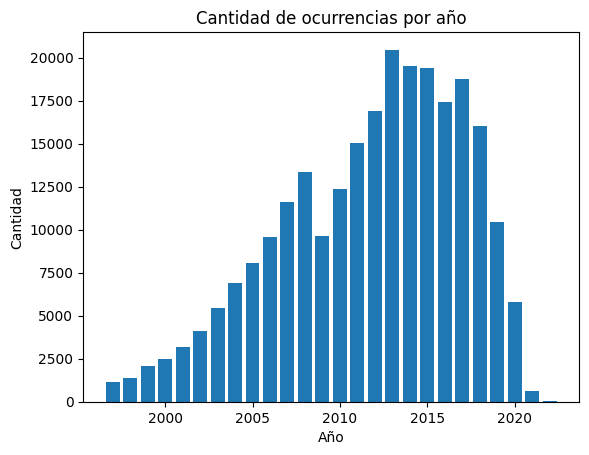

In [5]:
year_counts = df['year'].value_counts()

year_counts = year_counts.sort_index()

plt.bar(year_counts.index, year_counts.values)

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Cantidad de ocurrencias por año')

# Mostrar el gráfico
plt.show()


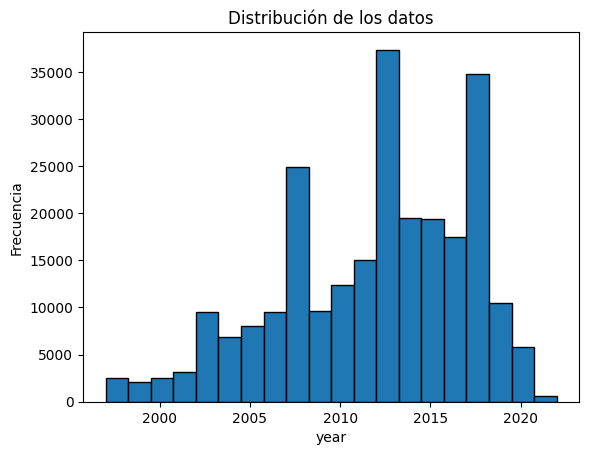

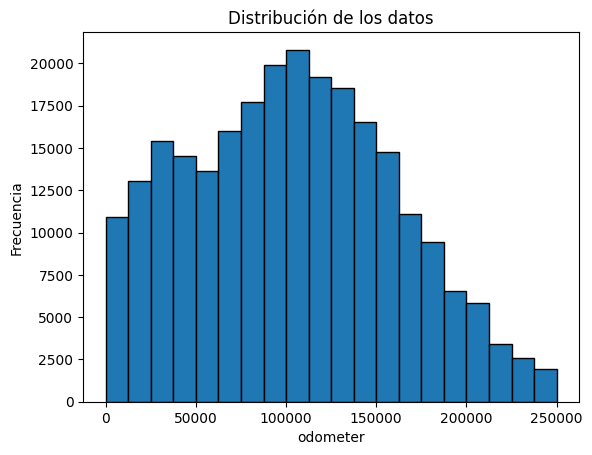

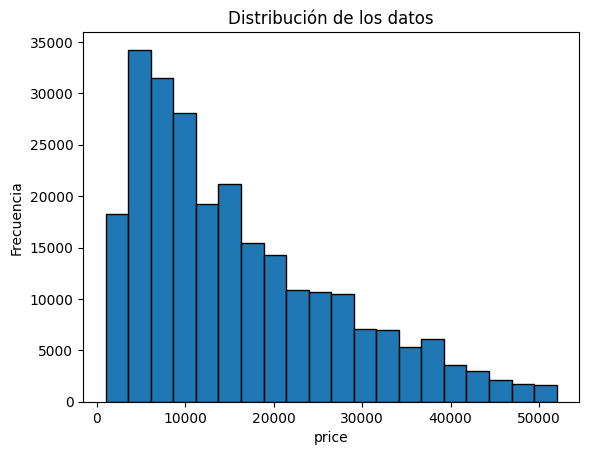

In [6]:
datos_num = ('year', 'odometer', 'price')

for n in datos_num:
    # Crear el histograma
    plt.hist(df[n], bins=20, edgecolor='black') # Puedes ajustar el número de bins según tus preferencias

    # Añadir etiquetas y título
    plt.xlabel(n)
    plt.ylabel('Frecuencia')
    plt.title('Distribución de los datos')

    # Mostrar el histograma
    plt.show()


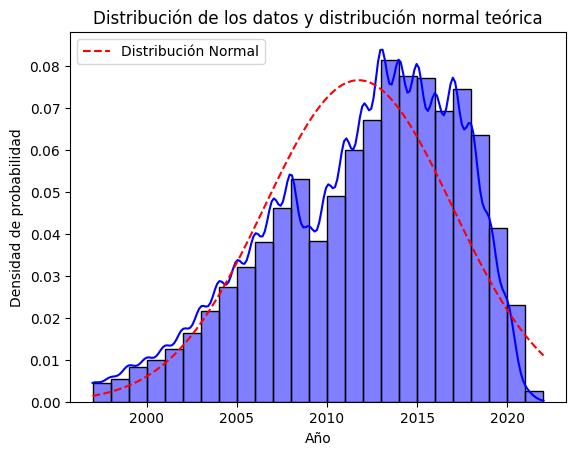

In [7]:
# Datos de la columna "year"
data = df['year']

# Calcular la media y la desviación estándar de los datos
mu, sigma = np.mean(data), np.std(data)

# Crear un rango de valores para el eje x
x = np.linspace(min(data), max(data), 100)

# Calcular la densidad de probabilidad de una distribución normal con los mismos parámetros
pdf = norm.pdf(x, mu, sigma)

# Crear el gráfico de densidad
sns.histplot(data, kde=True, stat='density', color='blue',linewidth=1,binwidth=1)  # Histograma con la densidad estimada
plt.plot(x, pdf, color='red', linestyle='--', label='Distribución Normal')  # Distribución normal teórica
plt.xlabel('Año')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de los datos y distribución normal teórica')
plt.legend()
plt.show()


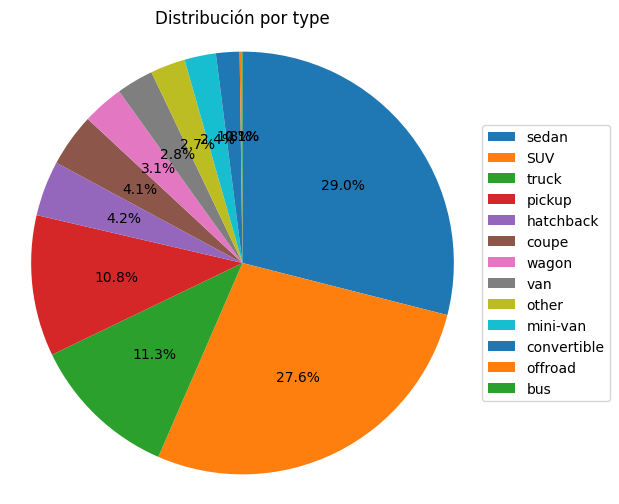

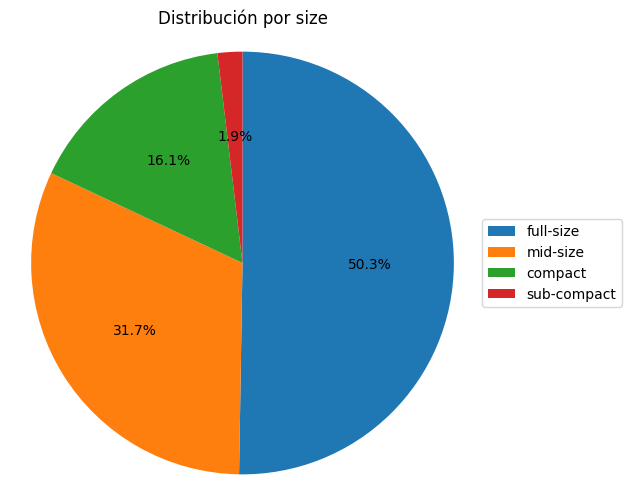

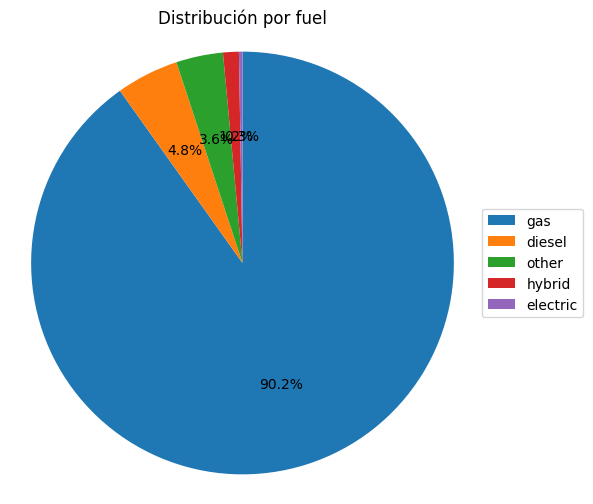

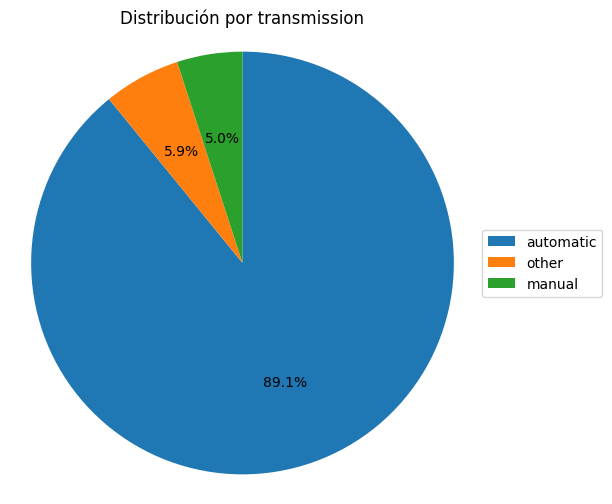

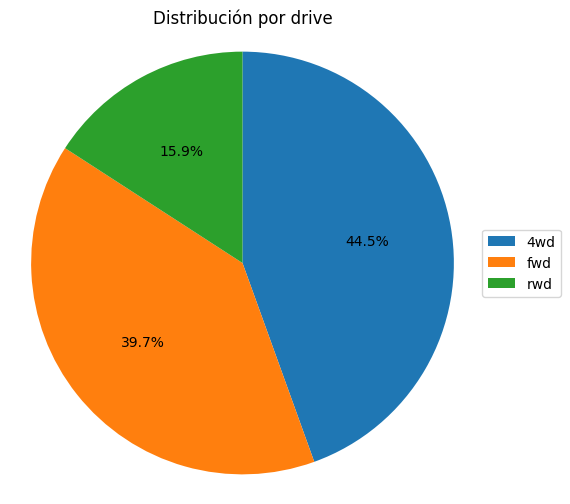

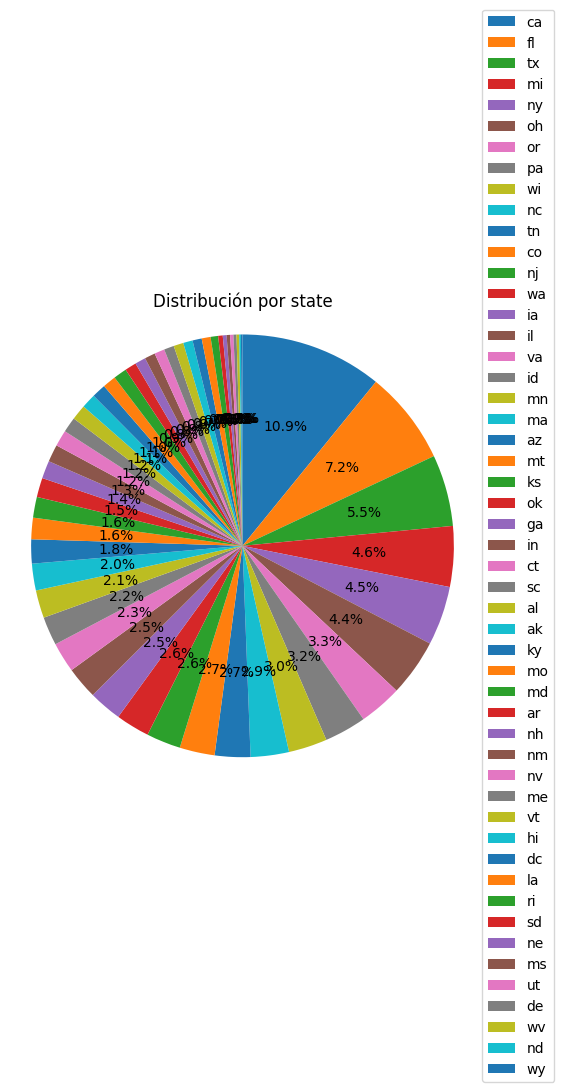

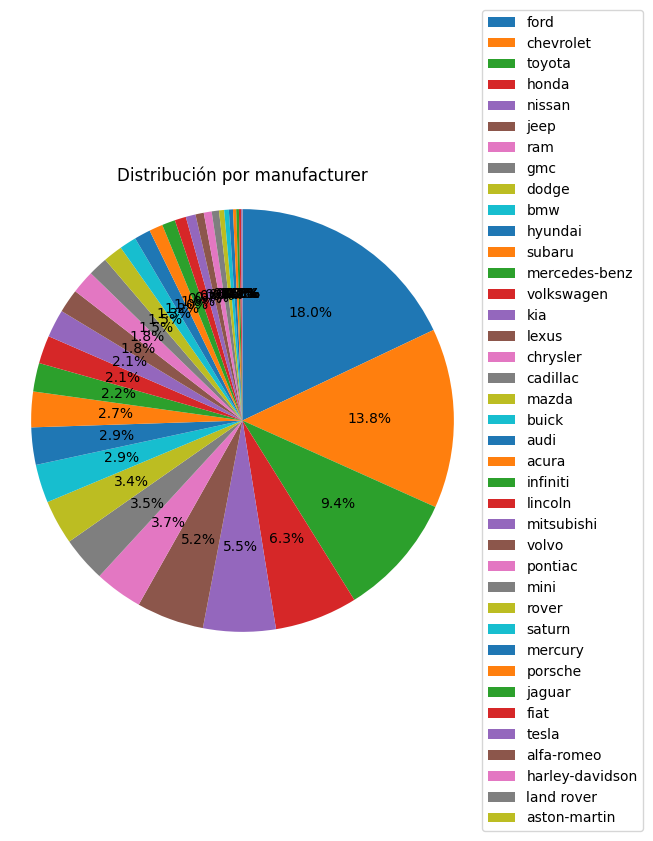

In [8]:
import matplotlib.pyplot as plt

datos = ('type', 'size', 'fuel', 'transmission', 'drive', 'state', 'manufacturer')

for d in datos:
    # Contar las ocurrencias de cada categoría en la columna correspondiente
    type_counts = df[d].value_counts()

    # Crear el gráfico de torta
    plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico según sea necesario
    plt.pie(type_counts, labels=None, autopct='%1.1f%%', startangle=90, counterclock=False)  # La primera categoría comienza a las 12 en punto y el resto sigue el orden de las agujas del reloj
    plt.axis('equal')  # Hace que el gráfico sea circular
    plt.title(f'Distribución por {d}')
    plt.legend(type_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))  # Coloca la leyenda fuera del gráfico
    plt.show()


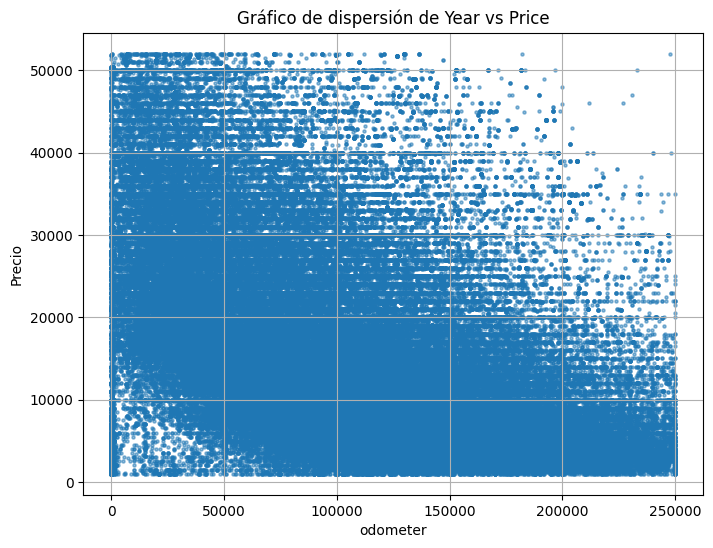

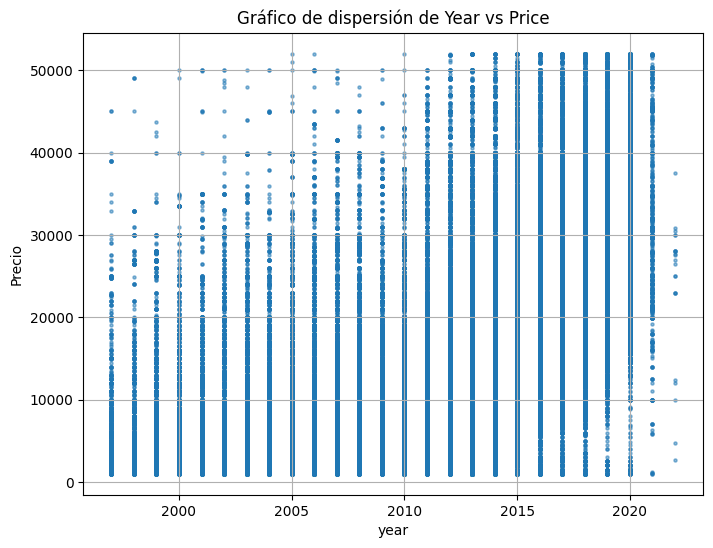

In [9]:
for n in ('odometer', 'year'):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[n], df['price'], alpha=0.5, s=5)  # alpha ajusta la transparencia de los puntos
    plt.title('Gráfico de dispersión de Year vs Price')
    plt.xlabel(n)
    plt.ylabel('Precio')
    plt.grid(True)  # Agrega cuadrícula al gráfico
    plt.show()


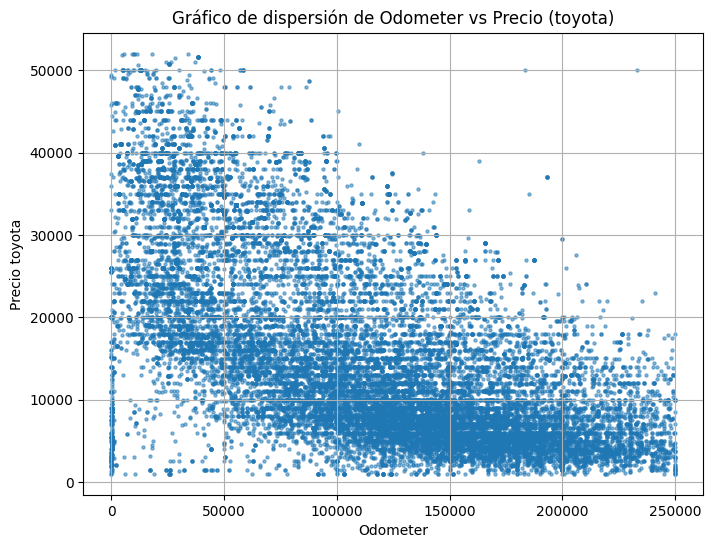

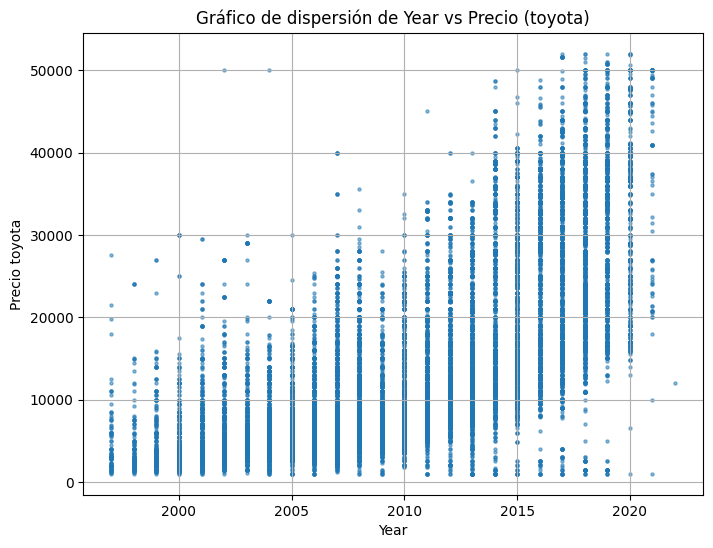

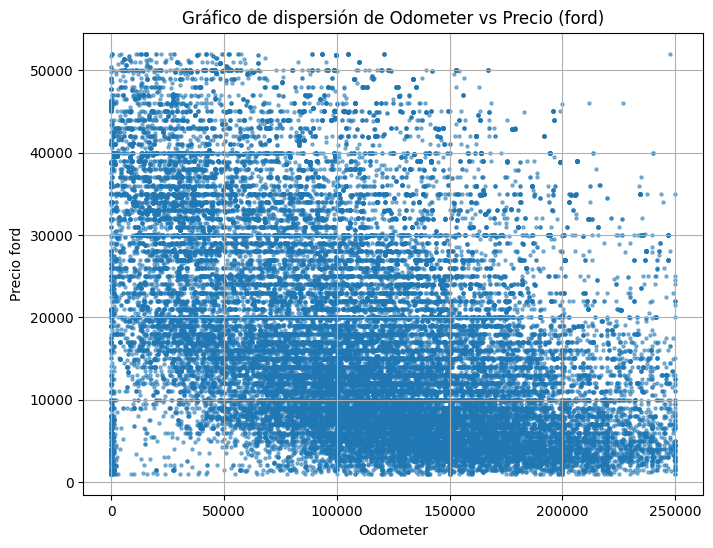

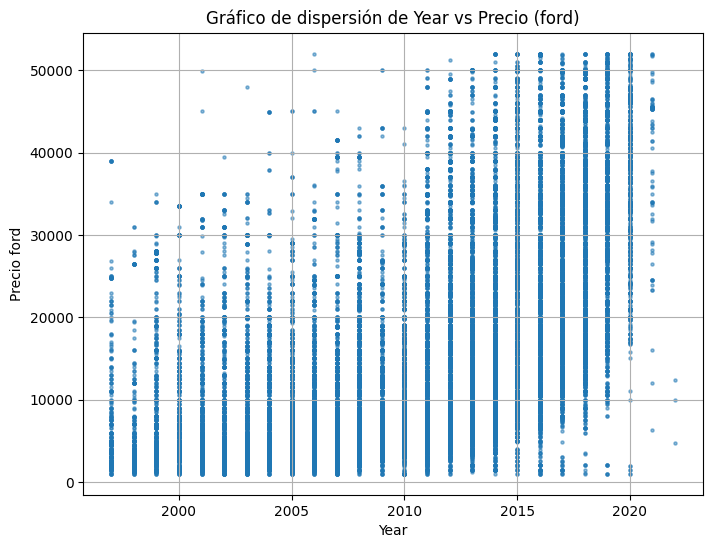

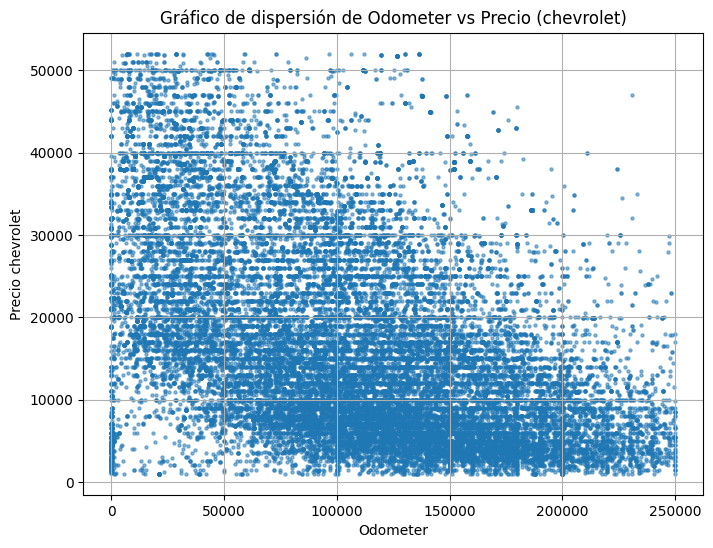

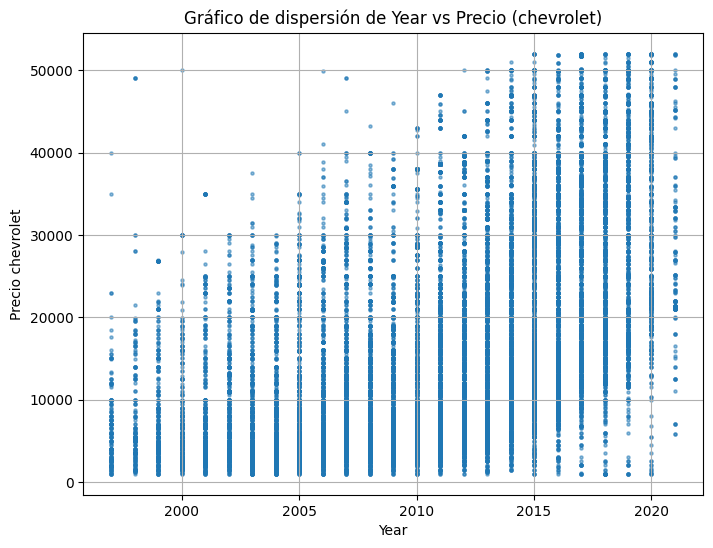

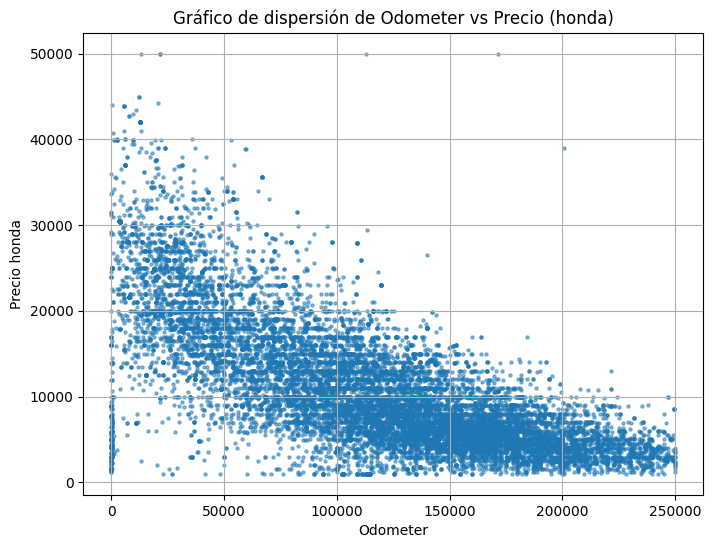

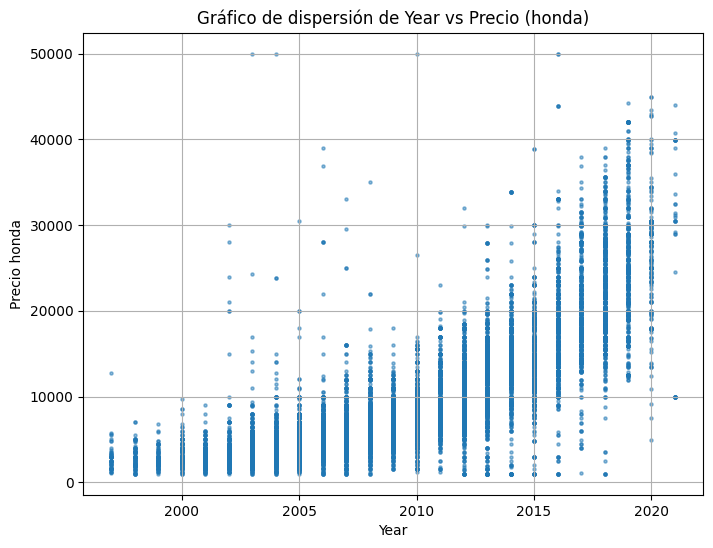

In [10]:
marcas = ['toyota', 'ford', 'chevrolet', 'honda']

for m in marcas:
    df_marca = df[df['manufacturer'] == m]
    for n in ('odometer', 'year'):
        plt.figure(figsize=(8, 6))
        plt.scatter(df_marca[n], df_marca['price'], alpha=0.5, s=5)  
        plt.title(f'Gráfico de dispersión de {n.capitalize()} vs Precio ({m})')
        plt.xlabel(n.capitalize())
        plt.ylabel('Precio ' + m)
        plt.grid(True)  # Agrega cuadrícula al gráfico
        plt.show()




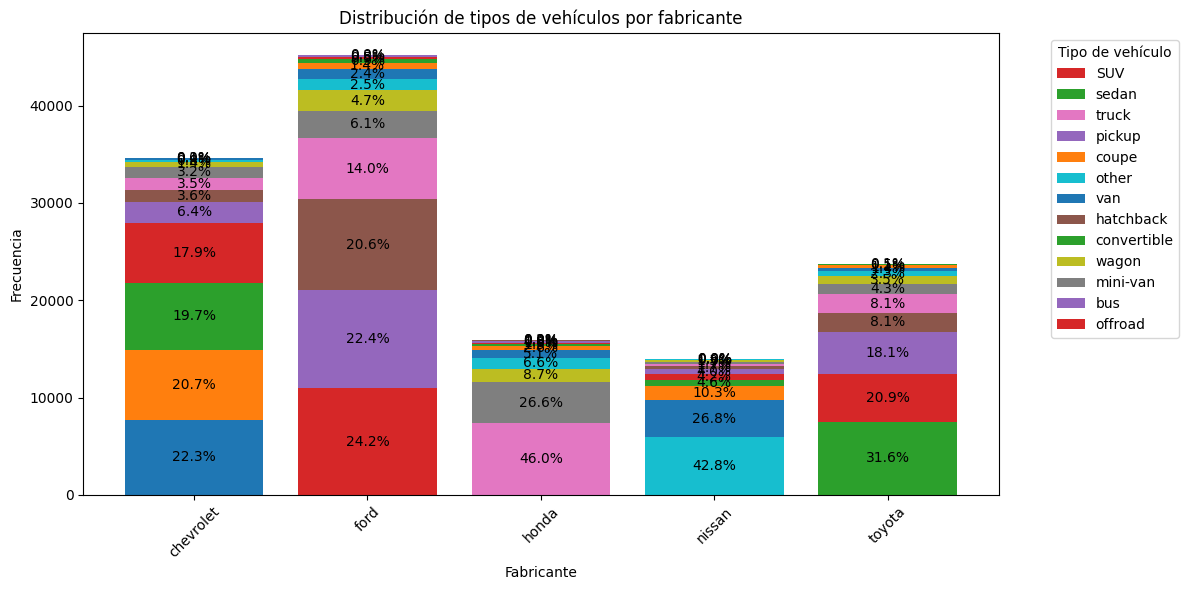

In [11]:
# Filtramos el dataframe para incluir solo los fabricantes especificados
manufacturers = ['toyota', 'ford', 'chevrolet', 'nissan', 'honda']
df_filtered = df[df['manufacturer'].isin(manufacturers)]

# Calculamos las frecuencias y porcentajes por fabricante y tipo
df_freq = df_filtered.groupby(['manufacturer', 'type']).size().unstack(fill_value=0)
df_percentages = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Ordenamos los tipos de vehículos por porcentaje para cada fabricante
sorted_types = df_percentages.apply(lambda x: x.sort_values(ascending=False).index, axis=1)

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Dibujamos las barras apiladas
for manufacturer in df_freq.index:
    bottom = 0
    for type in sorted_types[manufacturer]:
        height = df_freq.loc[manufacturer, type]
        percentage = df_percentages.loc[manufacturer, type]
        ax.bar(manufacturer, height, bottom=bottom, label=type, width=0.8)
        
        if height > 0:
            ax.text(manufacturer, bottom + height/2, f'{percentage:.1f}%', 
                    ha='center', va='center')
        
        bottom += height

# Configuramos el gráfico
ax.set_xlabel('Fabricante')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de tipos de vehículos por fabricante')
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Tipo de vehículo', 
          bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostramos el gráfico
plt.show()


C:\Users\sergi\AppData\Local\Temp\ipykernel_20800\3673853571.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


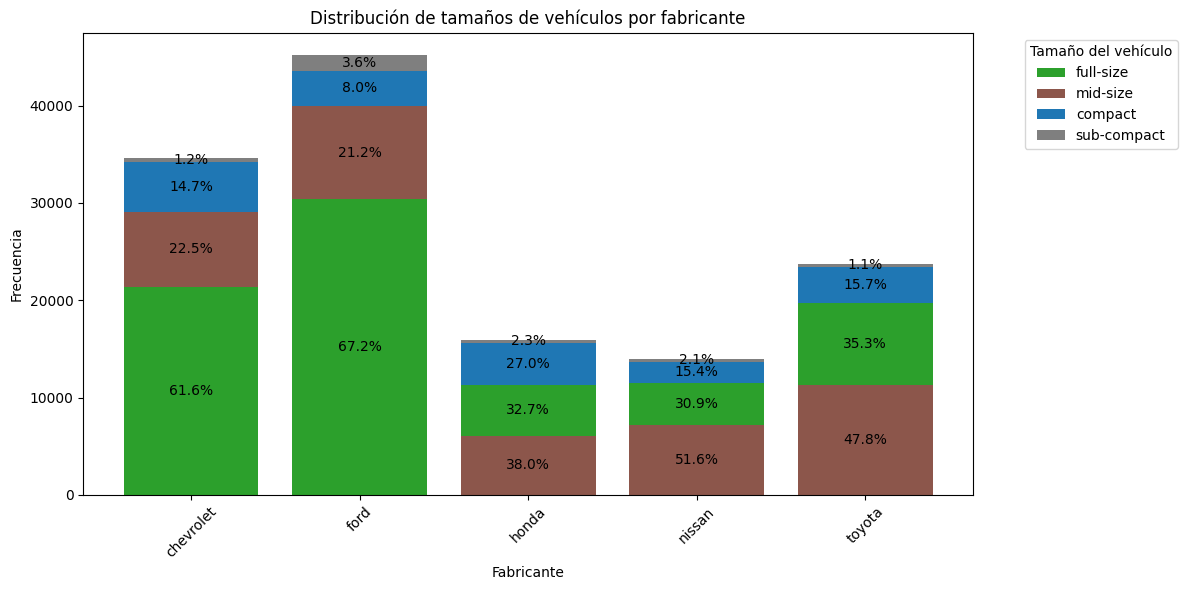

In [12]:
#import matplotlib.pyplot as plt
import pandas as pd

# Filtramos el dataframe para incluir solo los fabricantes especificados
manufacturers = ['toyota', 'ford', 'chevrolet', 'nissan', 'honda']
df_filtered = df[df['manufacturer'].isin(manufacturers)]

# Calculamos las frecuencias y porcentajes por fabricante y tamaño
df_freq = df_filtered.groupby(['manufacturer', 'size']).size().unstack(fill_value=0)
df_percentages = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Ordenamos los tamaños de vehículos por porcentaje para cada fabricante
sorted_sizes = df_percentages.apply(lambda x: x.sort_values(ascending=False).index, axis=1)

# Creamos una paleta de colores única para cada tamaño
unique_sizes = df_freq.columns.unique()
color_map = plt.cm.get_cmap('tab10')
color_dict = {size: color_map(i/len(unique_sizes)) for i, size in enumerate(unique_sizes)}

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Dibujamos las barras apiladas
for manufacturer in df_freq.index:
    bottom = 0
    for size in sorted_sizes[manufacturer]:
        height = df_freq.loc[manufacturer, size]
        percentage = df_percentages.loc[manufacturer, size]
        ax.bar(manufacturer, height, bottom=bottom, label=size, width=0.8, color=color_dict[size])
        
        if height > 0:
            ax.text(manufacturer, bottom + height/2, f'{percentage:.1f}%', 
                    ha='center', va='center')
        
        bottom += height

# Configuramos el gráfico
ax.set_xlabel('Fabricante')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de tamaños de vehículos por fabricante')

# Creamos una leyenda única
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Tamaño del vehículo', 
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

C:\Users\sergi\AppData\Local\Temp\ipykernel_20800\3377999302.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20')


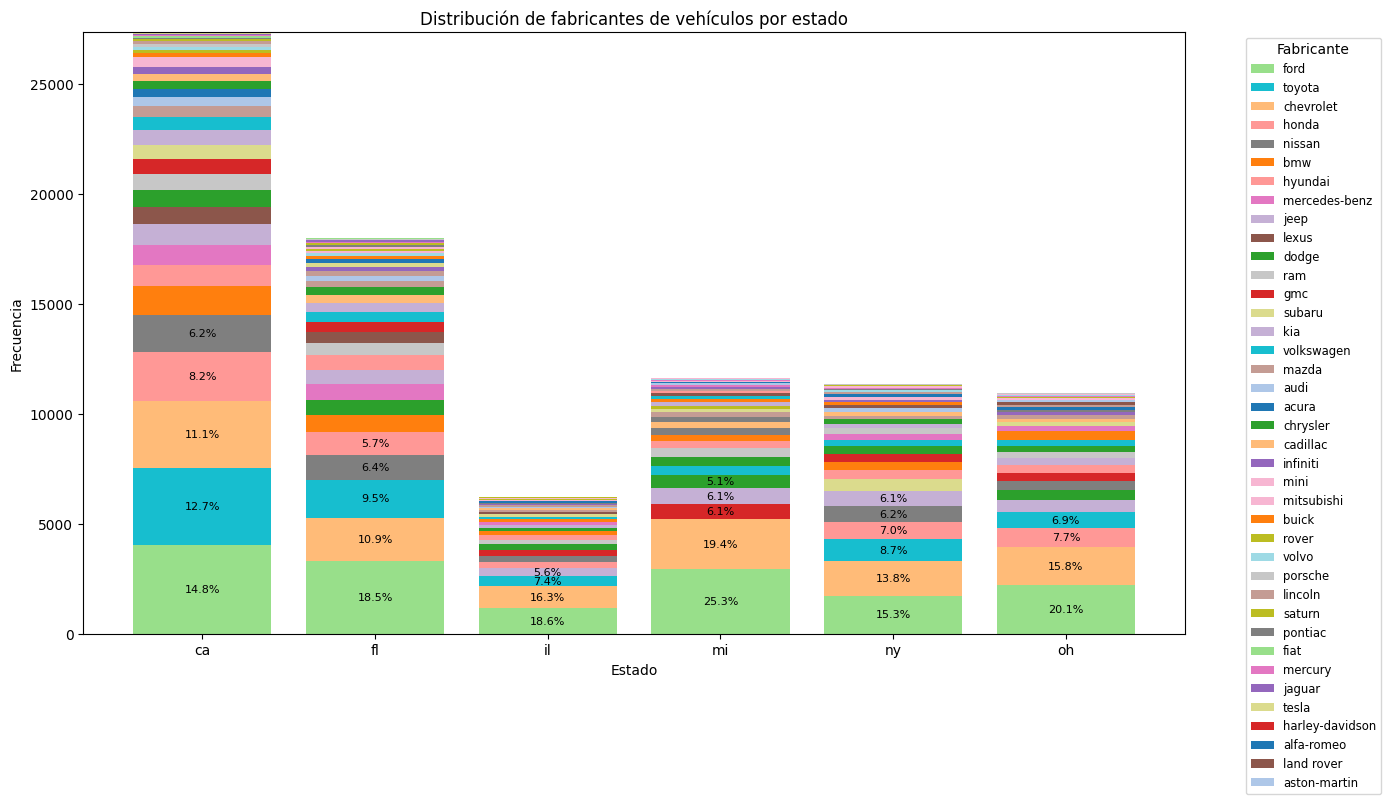

In [13]:
# Lista de estados especificados
states = ['ca', 'fl', 'oh', 'ny', 'il', 'mi']

# Filtramos el dataframe para incluir solo los estados especificados
df_filtered = df[df['state'].isin(states)]

# Calculamos las frecuencias y porcentajes por estado y fabricante
df_freq = df_filtered.groupby(['state', 'manufacturer']).size().unstack(fill_value=0)
df_percentages = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Ordenamos los fabricantes por porcentaje para cada estado
sorted_manufacturers = df_percentages.apply(lambda x: x.sort_values(ascending=False).index, axis=1)

# Creamos una paleta de colores única para cada fabricante
unique_manufacturers = df_freq.columns.unique()
color_map = plt.cm.get_cmap('tab20')
color_dict = {manufacturer: color_map(i/len(unique_manufacturers)) for i, manufacturer in enumerate(unique_manufacturers)}

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Dibujamos las barras apiladas
for state in df_freq.index:
    bottom = 0
    for manufacturer in sorted_manufacturers[state]:
        height = df_freq.loc[state, manufacturer]
        percentage = df_percentages.loc[state, manufacturer]
        ax.bar(state, height, bottom=bottom, label=manufacturer, width=0.8, color=color_dict[manufacturer])
        
        if height > 0 and percentage >= 5:  # Solo mostramos etiquetas para porcentajes >= 5%
            ax.text(state, bottom + height/2, f'{percentage:.1f}%', 
                    ha='center', va='center', fontsize=8)
        
        bottom += height

# Configuramos el gráfico
ax.set_xlabel('Estado')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de fabricantes de vehículos por estado')

# Creamos una leyenda única
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Fabricante', 
          bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.xticks(rotation=0)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

C:\Users\sergi\AppData\Local\Temp\ipykernel_20800\2581984219.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10')


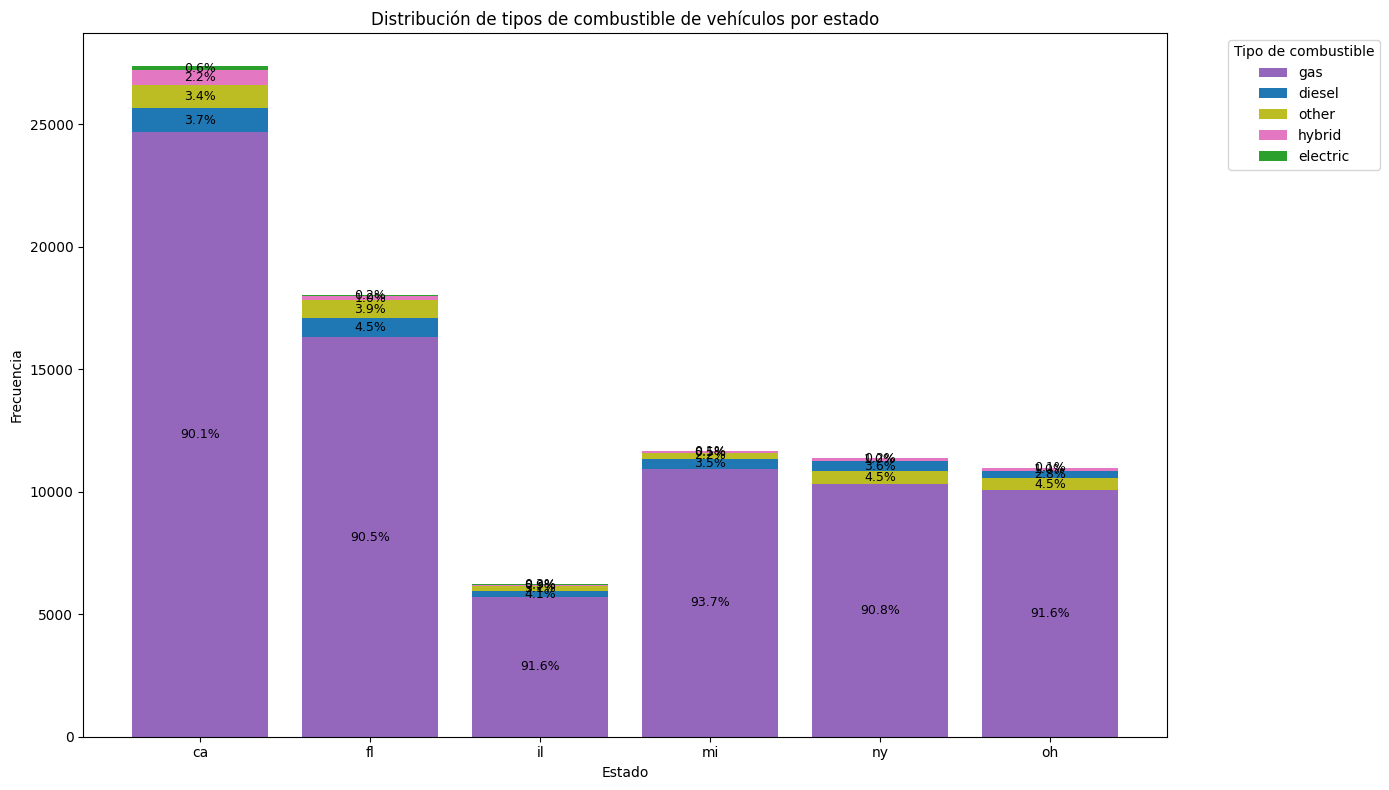

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de estados especificados
states = ['ca', 'fl', 'oh', 'ny', 'il', 'mi']

# Filtramos el dataframe para incluir solo los estados especificados
df_filtered = df[df['state'].isin(states)]

# Calculamos las frecuencias y porcentajes por estado y tipo de combustible
df_freq = df_filtered.groupby(['state', 'fuel']).size().unstack(fill_value=0)
df_percentages = df_freq.div(df_freq.sum(axis=1), axis=0) * 100

# Ordenamos los tipos de combustible por porcentaje para cada estado
sorted_fuels = df_percentages.apply(lambda x: x.sort_values(ascending=False).index, axis=1)

# Creamos una paleta de colores única para cada tipo de combustible
unique_fuels = df_freq.columns.unique()
color_map = plt.cm.get_cmap('tab10')
color_dict = {fuel: color_map(i/len(unique_fuels)) for i, fuel in enumerate(unique_fuels)}

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Dibujamos las barras apiladas
for state in df_freq.index:
    bottom = 0
    for fuel in sorted_fuels[state]:
        height = df_freq.loc[state, fuel]
        percentage = df_percentages.loc[state, fuel]
        ax.bar(state, height, bottom=bottom, label=fuel, width=0.8, color=color_dict[fuel])
        
        if height > 0:  # Mostramos todas las etiquetas de porcentaje
            ax.text(state, bottom + height/2, f'{percentage:.1f}%', 
                    ha='center', va='center', fontsize=9)
        
        bottom += height

# Configuramos el gráfico
ax.set_xlabel('Estado')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de tipos de combustible de vehículos por estado')

# Creamos una leyenda única
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Tipo de combustible', 
          bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=0)
plt.tight_layout()

# Mostramos el gráfico
plt.show()

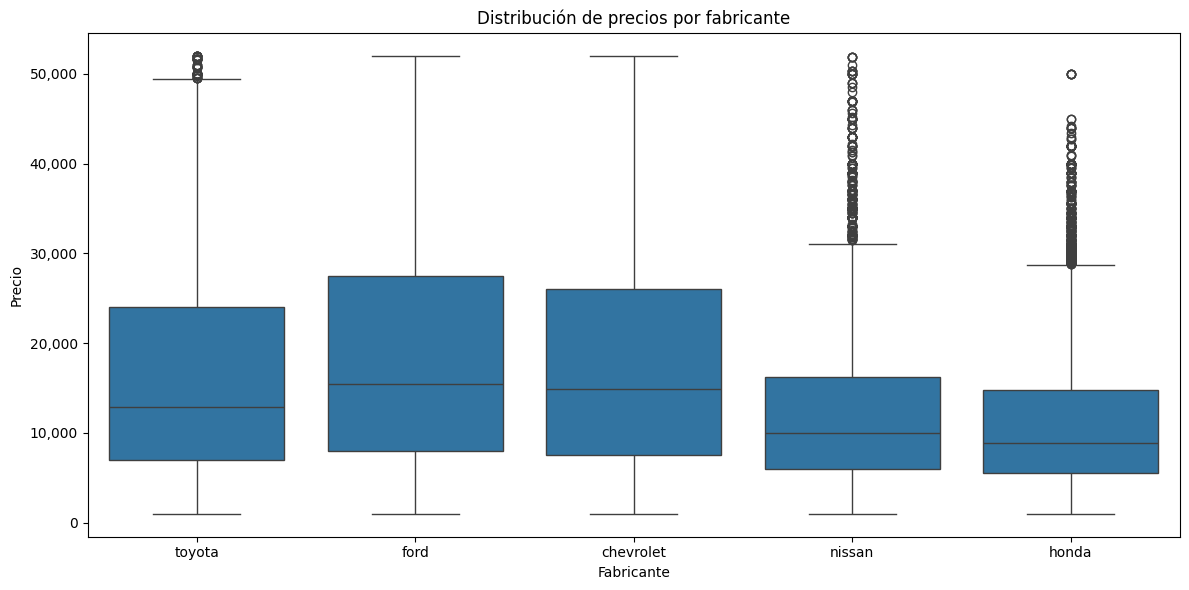

In [16]:
# Lista de fabricantes especificados
manufacturers = ['toyota', 'ford', 'chevrolet', 'nissan', 'honda']

# Filtramos el dataframe para incluir solo los fabricantes especificados
df_filtered = df[df['manufacturer'].isin(manufacturers)]

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=df_filtered, order=manufacturers)

# Configuramos el gráfico
plt.title('Distribución de precios por fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Precio')

# Rotamos las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=0)

# Ajustamos el formato de los valores del eje y para mostrar miles con coma
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Ajustamos los márgenes
plt.tight_layout()

# Mostramos el gráfico
plt.show()

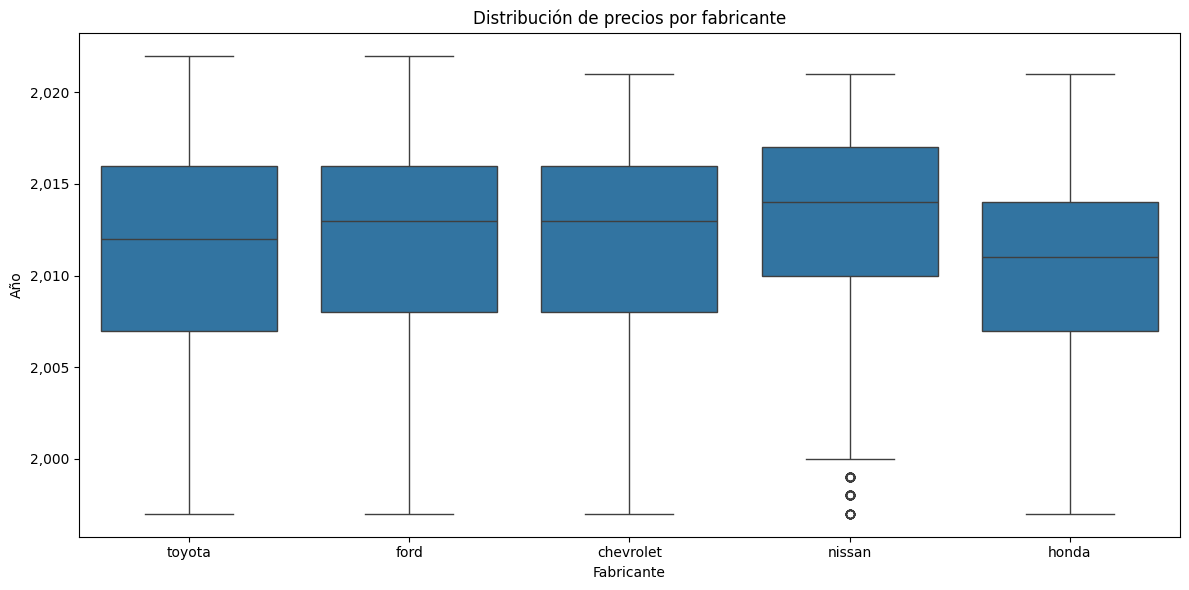

In [17]:
# Lista de fabricantes especificados
manufacturers = ['toyota', 'ford', 'chevrolet', 'nissan', 'honda']

# Filtramos el dataframe para incluir solo los fabricantes especificados
df_filtered = df[df['manufacturer'].isin(manufacturers)]

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='year', data=df_filtered, order=manufacturers)

# Configuramos el gráfico
plt.title('Distribución de precios por fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Año')

# Rotamos las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=0)

# Ajustamos el formato de los valores del eje y para mostrar miles con coma
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Ajustamos los márgenes
plt.tight_layout()

# Mostramos el gráfico
plt.show()

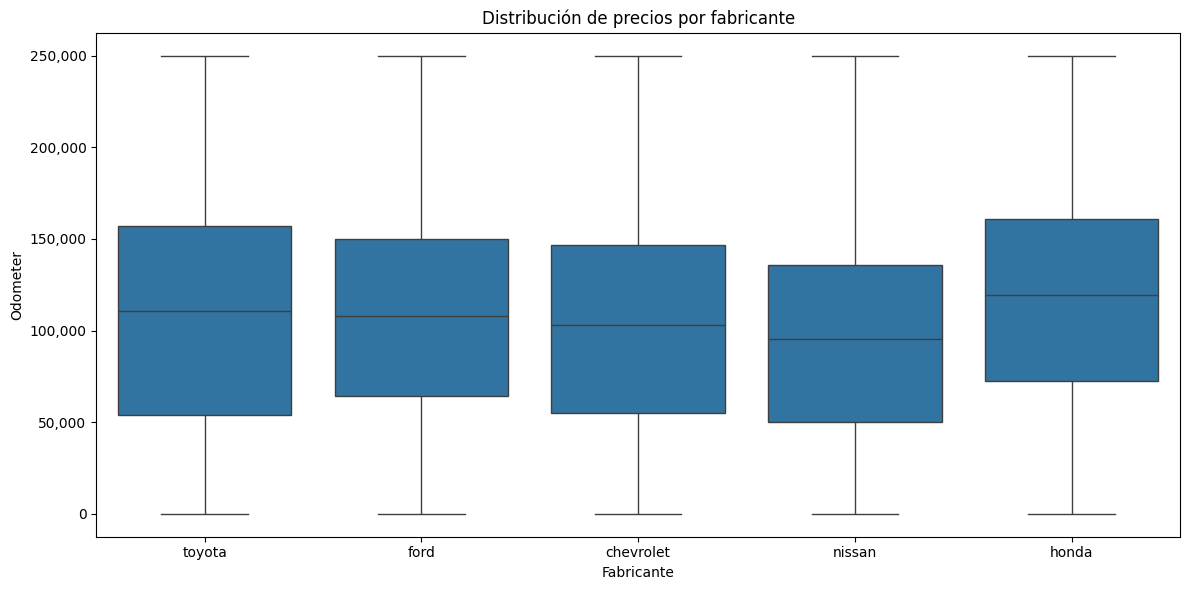

In [18]:
# Lista de fabricantes especificados
manufacturers = ['toyota', 'ford', 'chevrolet', 'nissan', 'honda']

# Filtramos el dataframe para incluir solo los fabricantes especificados
df_filtered = df[df['manufacturer'].isin(manufacturers)]

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='odometer', data=df_filtered, order=manufacturers)

# Configuramos el gráfico
plt.title('Distribución de precios por fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Odometer')

# Rotamos las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=0)

# Ajustamos el formato de los valores del eje y para mostrar miles con coma
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Ajustamos los márgenes
plt.tight_layout()

# Mostramos el gráfico
plt.show()

C:\Users\sergi\AppData\Local\Temp\ipykernel_20800\636723927.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([state.upper() for state in states])


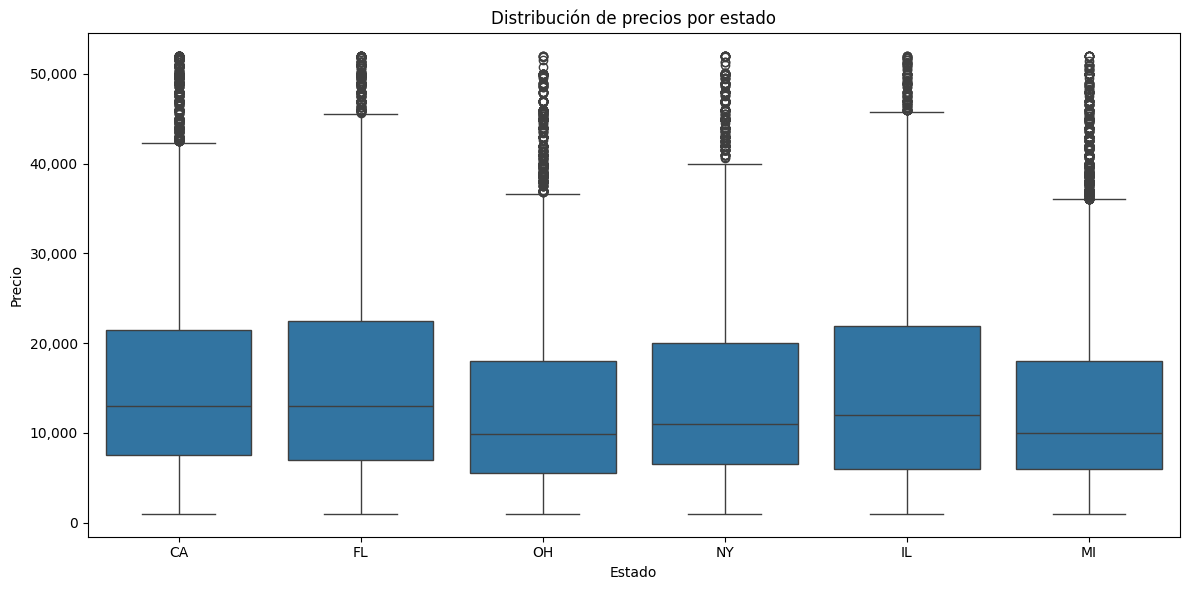

In [19]:
# Lista de estados especificados
states = ['ca', 'fl', 'oh', 'ny', 'il', 'mi']

# Filtramos el dataframe para incluir solo los estados especificados
df_filtered = df[df['state'].isin(states)]

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='price', data=df_filtered, order=states)

# Configuramos el gráfico
plt.title('Distribución de precios por estado')
plt.xlabel('Estado')
plt.ylabel('Precio')

# Rotamos las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=0)

# Ajustamos el formato de los valores del eje y para mostrar miles con coma
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Convertimos las etiquetas de estado a mayúsculas
plt.gca().set_xticklabels([state.upper() for state in states])

# Ajustamos los márgenes
plt.tight_layout()

# Mostramos el gráfico
plt.show()

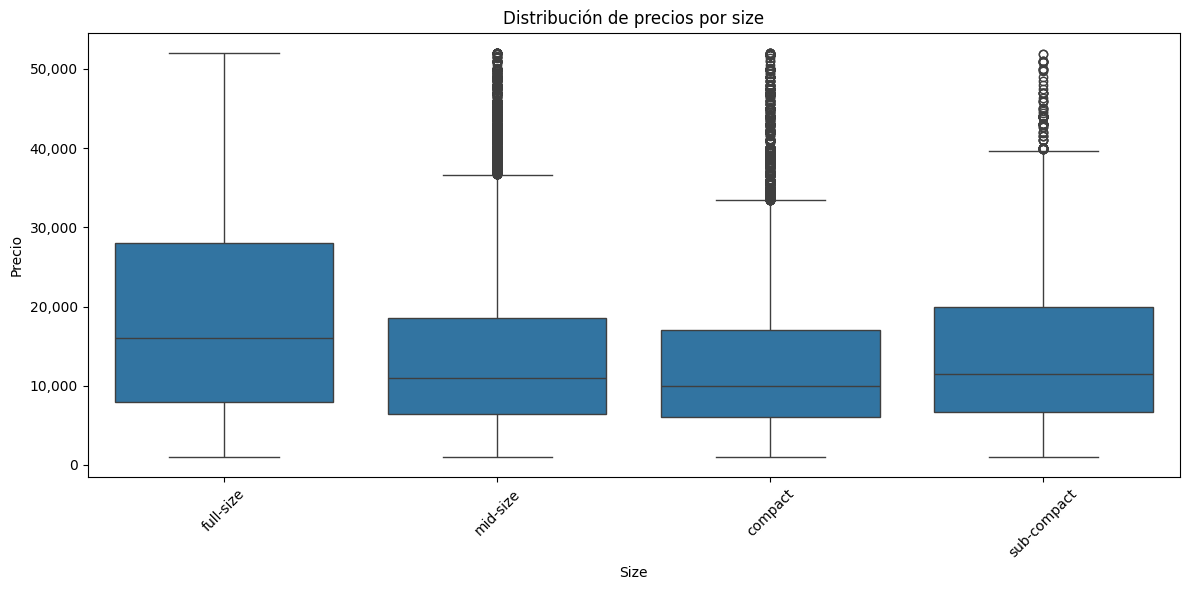

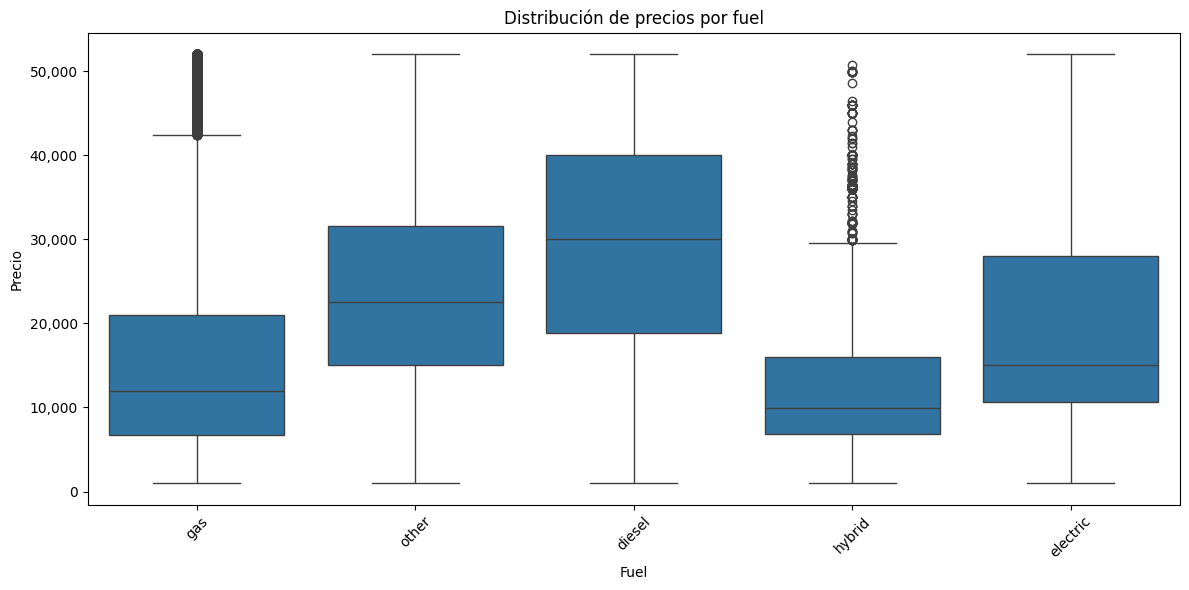

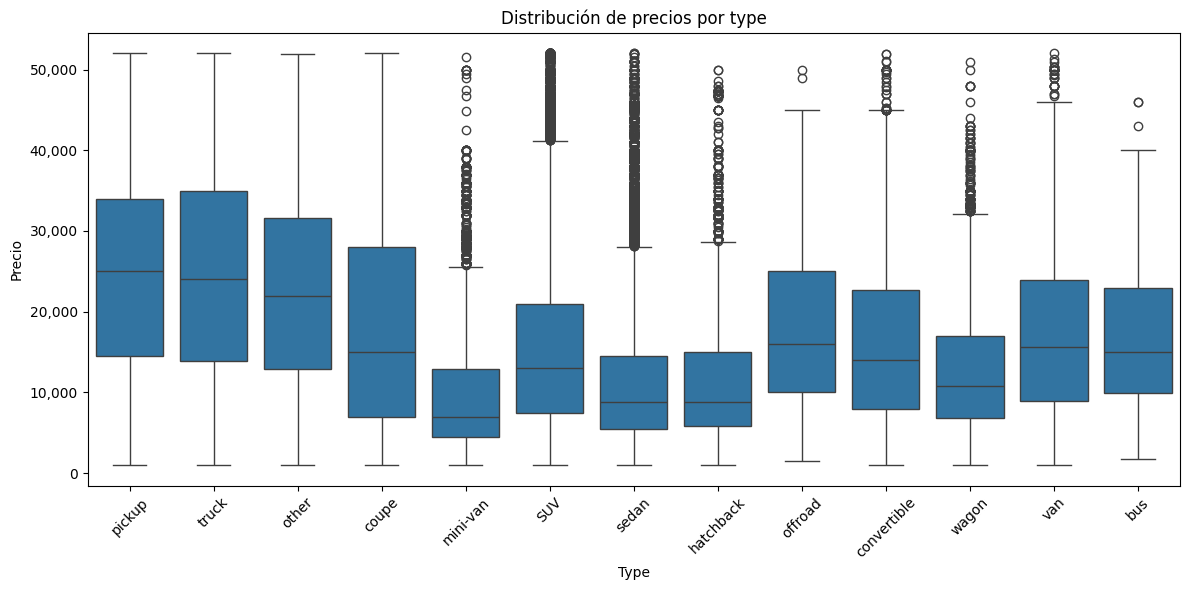

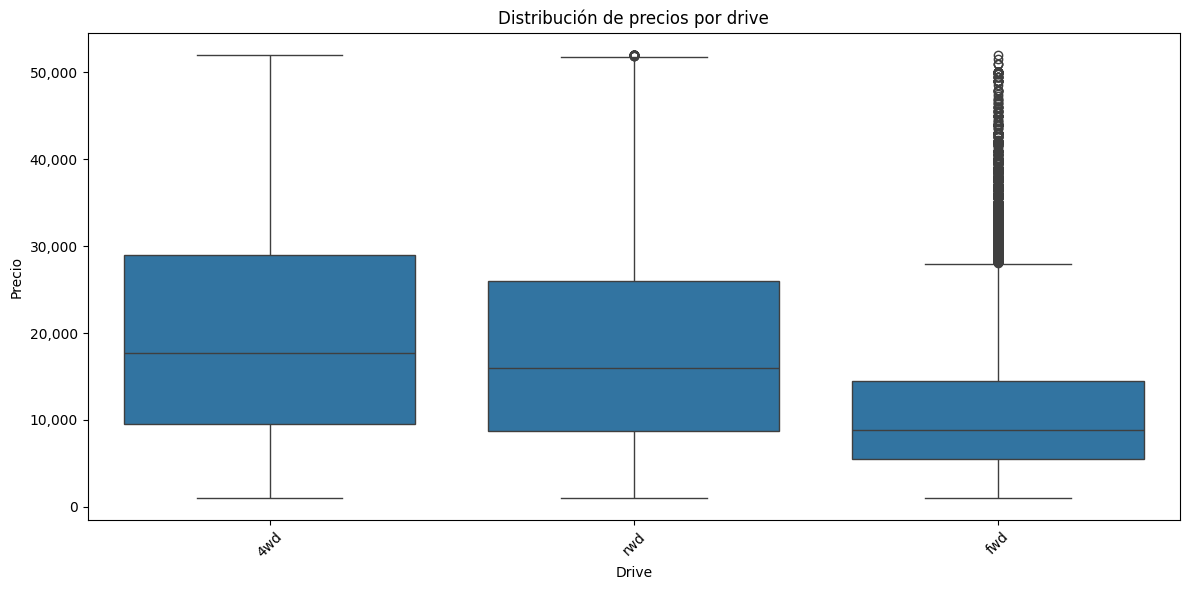

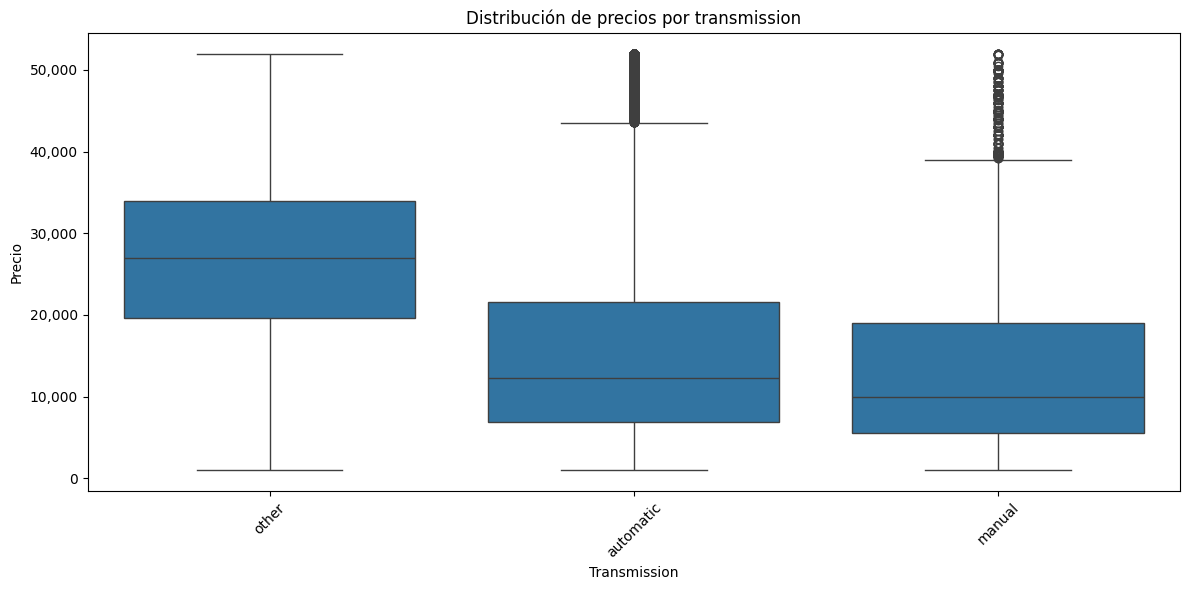

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ('size', 'fuel', 'type', 'drive', 'transmission')

for v in variables:
    # Creamos el gráfico
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=v, y='price', data=df)

    # Configuramos el gráfico
    plt.title(f'Distribución de precios por {v}')
    plt.xlabel(v.capitalize())
    plt.ylabel('Precio')

    # Rotamos las etiquetas del eje x para mejor legibilidad
    plt.xticks(rotation=45)

    # Ajustamos el formato de los valores del eje y para mostrar miles con coma
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    # Ajustamos los márgenes
    plt.tight_layout()

    # Mostramos el gráfico
    plt.show()

